# Task 2.6 Dashboard Creation

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from keplergl import KeplerGl
from streamlit_keplergl import keplergl_static

## Data Wrangling

In [3]:
dtype_mapping = {6: str, 8: str} # force columns as string data types
df = pd.read_csv('NY_Citi_Bike_Weather_Data.csv', dtype=dtype_mapping)

In [6]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,0,BFD29218AB271154,electric_bike,2022-01-21 13:22:31.463,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,both
1,1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:41:43.422,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6,both
2,2,95893ABD40CED4B8,electric_bike,2022-01-26 11:06:35.227,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3,both
3,3,F853B50772137378,classic_bike,2022-01-03 09:10:50.475,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4,both
4,4,7590ADF834797B4B,classic_bike,2022-01-22 14:34:57.474,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9,both


In [8]:
df.shape

(29838806, 17)

In [10]:
# create dataframe sample so computer can process it
df_sample = df.sample(frac=0.05, random_state=42).reset_index(drop=True)

In [12]:
df_sample.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,15115901,25098D3FFB6B3BBD,electric_bike,2022-07-04 17:19:00.525,2022-07-04 17:19:00.525,Central Park West & W 85 St,7354.01,Grand Army Plaza & Central Park S,6839.10,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,25.6,both
1,753105,FCED437CC64165BA,classic_bike,2022-01-14 09:27:58.570,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,5880.02,W 16 St & The High Line,6233.05,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,4.8,both
2,23821092,22DE76A19BAD1251,electric_bike,2022-10-09 18:08:06.487,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,5034.03,N 12 St & Bedford Ave,5450.04,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,12.3,both
3,17525642,1A009107ED10A6FB,electric_bike,2022-08-05 19:38:10.967,2022-08-05 19:38:10.967,Hope St & Union Ave,5187.03,38 St & 30 Ave,6850.01,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,29.3,both
4,6397983,2B63FBA517507650,classic_bike,2022-05-10 15:29:29.183,2022-05-10 15:29:29.183,6 Ave & W 33 St,6364.07,Broadway & W 29 St,6289.06,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,15.4,both


In [14]:
df_sample.shape

(1491940, 17)

In [18]:
df_sample.drop(columns=['Unnamed: 0', '_merge'], inplace=True)

In [20]:
df_sample.to_csv('Data_Small_Sample.csv')

In [23]:
# create month column 
df_sample['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df_sample['month'] = df_sample['date'].dt.month
df_sample['month'] = df_sample['month'].astype('int')

In [26]:
# create season column
df_sample['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df_sample['month']
    ]

In [32]:
df_sample.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'month', 'season'],
      dtype='object')

## Create Plotly Charts

In [36]:
# create groups and top 20 dataframe
df_sample['value'] = 1 
df_groupby_bar = df_sample.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

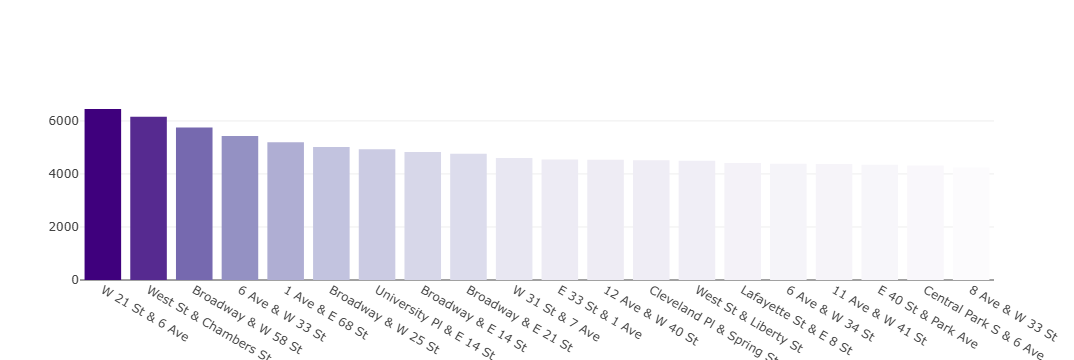

In [42]:
# create bar chart
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Purples'}))
fig.show()

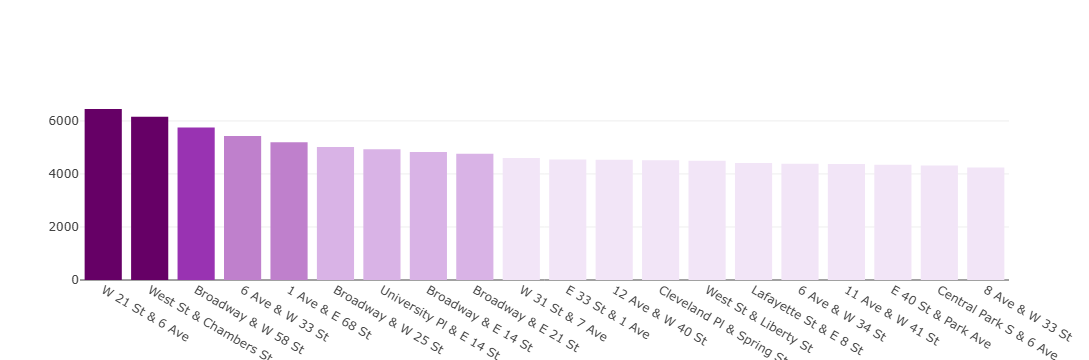

In [44]:
# attempting a more progressive color scheme
# define five shades of purple from light to dark
colors = ['#f2e5f7', '#d9b3e6', '#bf80cc', '#9933b2', '#660066']
# create bins to categorize 'value' into 5 groups
bins = np.linspace(top20['value'].min(), top20['value'].max(), 6)  # 6 edges = 5 bins
color_indices = np.digitize(top20['value'], bins) - 1  # indices from 0 to 4
# ensure indices stay within 0-4
color_indices = np.clip(color_indices, 0, 4)
# map each bar to one of the 5 colors
discrete_colors = [colors[i] for i in color_indices]
# create bar chart
fig = go.Figure(go.Bar(
    x=top20['start_station_name'],
    y=top20['value'],
    marker=dict(color=discrete_colors)
))
fig.show()

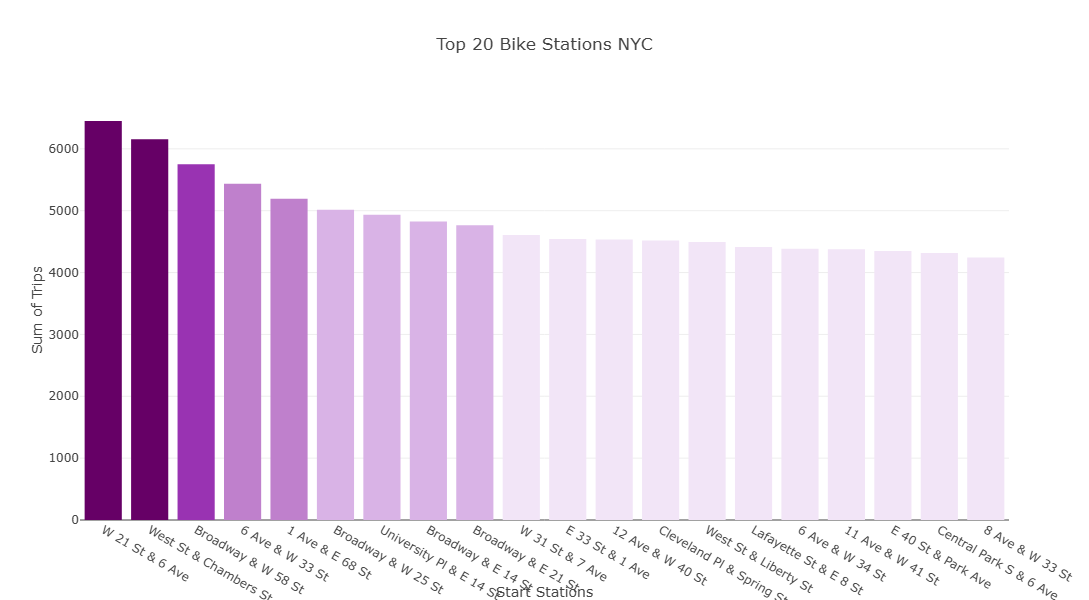

In [52]:
# create bar chart (couldn't figure out how to not make the x-axis label and titles overlap)
fig.update_layout(
    title = 'Top 20 Bike Stations NYC',
    xaxis_title = 'Start Stations',
    yaxis_title ='Sum of Trips',
    width = 900, height = 600
)

In [59]:
# add new column of total trip counts by date
df_sample['trip_count'] = df_sample.groupby('date')['ride_id'].transform('count')

In [ ]:
# create line chart

fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(
go.Scatter(x = df_sample['date'], y = df_sample['trip_count'], name = 'Daily Bike Rides'),
secondary_y = False
)

fig.add_trace(
go.Scatter(x=df_sample['date'], y = df_sample['avgTemp'], name = 'Daily Temperature'),
secondary_y=True
)